In [228]:
def calculate_weight(X, xx, tau):
    W = np.eye(M)
    for i in range(0,M):
        W[i,i] = np.exp(((X[i]-xx).T)@(X[i]-xx)/(-2*tau*tau))
    return W

In [229]:
def predict(X, y, xx, tau):
    X = np.append(np.ones((M,1)),X, axis = 1)
    xx = np.array([1,xx])
    W = calculate_weight(X, xx, tau)
    theta = np.linalg.pinv(X.T@W@X)@(X.T@W@y)
    prediction = np.dot(xx, theta)
    return  prediction

In [230]:
def plot_predictions(X, y, taus, N):
    start = -3
    stop = 3
    X_test = np.arange(start, stop, (stop-start)/N)
    predictions = np.zeros((N, 1))
    i = 0
    j = 0
    n = int(np.ceil(np.sqrt(len(taus))))
    fig, axes = plt.subplots(n, n, figsize = (20,20))
    for tau in taus:
        i = 0
        for xx in X_test:
            predictions[i] = predict(X, y, xx, tau)
            i += 1
        ax = axes[j//n][j%n]
        ax.plot(X, y, 'b.')
        ax.plot(X_test, predictions, 'r.')
        j += 1
    plt.show()
        

In [231]:
M = 1000
N = 1

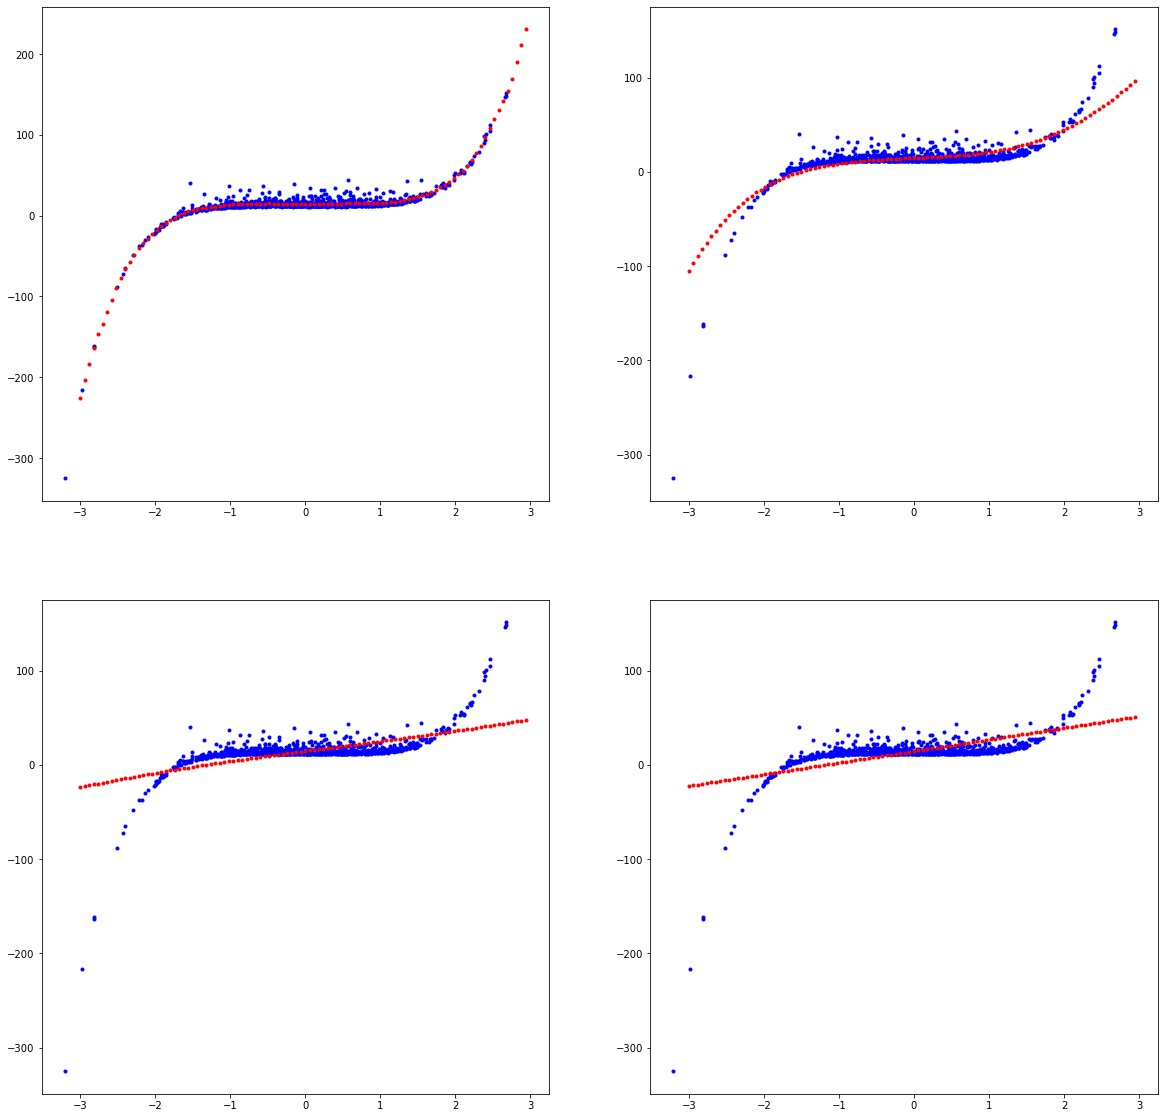

In [232]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)

X = np.random.randn(M,1)
y = (X**5) + 11 + 2.3*np.exp(np.random.randn(M,1))
plot_predictions(X, y, [0.08, 1, 3, 100], 100)